TOF = DIFC \* d + DIFA \* d^2 + TZERO

$ tof = (L1+L2)/v $

$ k = 0.0015882549421289758 \times v $

$ 2d sin(\theta) = \lambda $

$ \lambda = \frac{2\pi}{k} $

$ tof = (L1+L2)/(2\pi) \; 2d \; sin(\theta) \times 0.0015882549421289758 $

$ DIFC = (L1+L2)/(\pi) \; sin(\theta) \times 0.0015882549421289758 \times 10^6 $

# Calibration for Powder Diffraction
There are two general interfaces used for calibrating instruments for powder diffraction that are covered in this tutorial
* [Calibration Information](#Calibration-Information)
* [PDCalibration](#PDCalibration)

The tutorial also covers information about masking calibration files

In [1]:
# setup plotting
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# plt.xkcd() # comment this out for serious science
# plt.rcdefaults()
# useful modules
import os
# ...and, of course, mantid
from mantid.simpleapi import *

In [3]:
import numpy as np
from mantid import simpleapi as msa

## Calibration Information
For all of the calibrations there needs to be a "known" lattice constant to calibrate against when determining the tof to dspacing conversion factors. Traditionally at SNS diamond is used for this. Mantid has a facility for [crystal structure and reflections](http://docs.mantidproject.org/nightly/concepts/CrystalStructureAndReflections.html) built in.

In [4]:
from mantid.geometry import CrystalStructure, ReflectionGenerator

In [46]:
latticeConstants = ['5.43102' for i in xrange(3)] # 
Si = CrystalStructure(' '.join(latticeConstants),
                           "F d -3 m", "Si 0 0 0 1.0 0.05")
generator = ReflectionGenerator(Si)
dvalues = generator.getDValues(generator.getUniqueHKLs(.4,4.))
print dvalues

[3.1356,1.92016,1.5678,1.63751,1.24596,1.0452,1.35776,1.1086,0.960078,0.90517,0.7839,1.0452,0.91801,0.828223,0.760495,0.707059,0.62712,0.85872,0.818757,0.725751,0.658608,0.640052,0.622981,0.578949,0.5226,0.760495,0.707059,0.663505,0.62712,0.596132,0.545838,0.545838,0.525037,0.489699,0.447943,0.678878,0.640052,0.607206,0.592573,0.554301,0.532555,0.504258,0.465706,0.480039,0.47271,0.452585,0.424091,0.596132,0.569326,0.545838,0.525037,0.506445,0.47451,0.47451,0.460653,0.43623,0.405933,0.42539,0.41532,0.532555,0.5226,0.495782,0.47271,0.465706,0.459005,0.440514,0.414111,0.419012,0.404804,0.489699,0.47451,0.460653,0.447943,0.43623,0.41532,0.41532,0.405933,0.452585,0.440514,0.42936,0.424091,0.409379,0.40038,0.41532,0.405933]


In [47]:
dvalues = np.array(dvalues)
dvalues = np.array(dvalues*1e8, dtype=int)/1e8
dvalues = np.unique(dvalues)
dvalues

array([ 0.4003801 ,  0.40480433,  0.40593349,  0.40937853,  0.41411139,
        0.41532047,  0.41901228,  0.42409141,  0.42539031,  0.42935983,
        0.43623002,  0.44051389,  0.44794297,  0.452585  ,  0.45900496,
        0.4606531 ,  0.46570612,  0.47270961,  0.47451042,  0.48003888,
        0.48969858,  0.49578202,  0.50425754,  0.50644522,  0.52260014,
        0.52503652,  0.53255532,  0.54583804,  0.55430115,  0.56932559,
        0.57894867,  0.59257286,  0.59613189,  0.60720649,  0.62298071,
        0.62712017,  0.64005184,  0.65860791,  0.66350469,  0.6788775 ,
        0.70705857,  0.72575057,  0.76049491,  0.78390021,  0.81875707,
        0.82822278,  0.85871966,  0.90517   ,  0.91800993,  0.96007776,
        1.04520028,  1.10860231,  1.24596143,  1.357755  ,  1.56780042,
        1.63751414,  1.92015553,  3.13560085])

### Get d values from exp data

Load data

In [37]:
%%time
wkspName='SEQ_130273'

LoadEventAndCompress(Filename="/SNS/SEQ/IPTS-19573/nexus/SEQ_130273.nxs.h5", OutputWorkspace=wkspName,
                     MaxChunkSize=16, FilterBadPulses=25)
CropWorkspace(InputWorkspace=wkspName, OutputWorkspace=wkspName, XMin=300, XMax=16666.7)

CPU times: user 5min 40s, sys: 3min 52s, total: 9min 33s
Wall time: 4min 10s


In [39]:
# mtd.getObjectNames()

Convert to I(d)

In [40]:
%%time
I_d = msa.ConvertUnits(InputWorkspace=wkspName, OutputWorkspace='I_d', Target='dSpacing', EMode='Elastic')

In [41]:
%%time
msa.Rebin(InputWorkspace='I_d', OutputWorkspace='I_d', Params='0.4,0.00005,7')

CPU times: user 112 ms, sys: 0 ns, total: 112 ms
Wall time: 111 ms


EventWorkspace
Title: Si powder, White beam, Ei set to 250meV T0=30
Histograms: 115712
Bins: 132000
Histogram
X axis: d-Spacing / Angstrom
Y axis: Counts
Distribution: False
Instrument: SEQUOIA (2012-Apr-04 to 2100-Jan-31)Instrument from: /SNS/SEQ/IPTS-19573/nexus/SEQ_130271.nxs.h5

Parameters from: /home/lj7/dv/mantid/mantid/instrument/SEQUOIA_Parameters.xml
Run start: 2017-Jul-14 04:26:01
Run end:  2017-Jul-14 06:21:57

Events: 974761163 (weighted, no times)

In [42]:
%%time
msa.SumSpectra(InputWorkspace='I_d', OutputWorkspace='I_d_s')

EventWorkspace
Title: Si powder, White beam, Ei set to 250meV T0=30
Histograms: 1
Bins: 132000
Histogram
X axis: d-Spacing / Angstrom
Y axis: Counts
Distribution: False
Instrument: SEQUOIA (2012-Apr-04 to 2100-Jan-31)Instrument from: /SNS/SEQ/IPTS-19573/nexus/SEQ_130271.nxs.h5

Parameters from: /home/lj7/dv/mantid/mantid/instrument/SEQUOIA_Parameters.xml
Run start: 2017-Jul-14 04:26:01
Run end:  2017-Jul-14 06:21:57

Events: 974761163 (weighted, no times)

In [43]:
# mtd.getObjectNames()

Plot

<IPython.core.display.Javascript object>


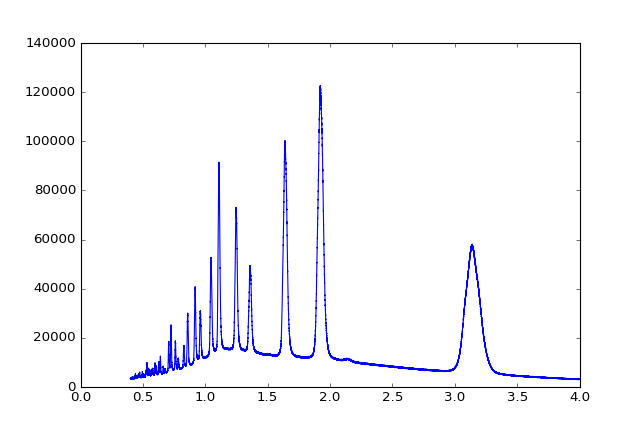

(0, 4)

In [80]:
plt.figure(figsize=(6,4))
I_d_sum = mtd['I_d_s']
plt.plot(I_d_sum.readX(0)[:-1], I_d_sum.readY(0))
plt.xlim(0,4)

In [51]:
# dvalues

Compare these with the plot, we just pick the few peaks

In [57]:
dvalues1 = list(dvalues[-18:])
del dvalues1[4]
del dvalues1[6]
del dvalues1[12]

In [58]:
dvalues1

[0.70705857000000005,
 0.72575056999999998,
 0.76049491000000002,
 0.78390020999999999,
 0.82822278000000005,
 0.85871966,
 0.91800992999999997,
 0.96007776,
 1.04520028,
 1.10860231,
 1.2459614299999999,
 1.357755,
 1.63751414,
 1.9201555299999999,
 3.1356008499999999]

[PDCalibration](http://docs.mantidproject.org/nightly/algorithms/PDCalibration-v1.html)
-------------------------------------

In [26]:
PDCalibration?

In [59]:
dvalues

array([ 0.4003801 ,  0.40480433,  0.40593349,  0.40937853,  0.41411139,
        0.41532047,  0.41901228,  0.42409141,  0.42539031,  0.42935983,
        0.43623002,  0.44051389,  0.44794297,  0.452585  ,  0.45900496,
        0.4606531 ,  0.46570612,  0.47270961,  0.47451042,  0.48003888,
        0.48969858,  0.49578202,  0.50425754,  0.50644522,  0.52260014,
        0.52503652,  0.53255532,  0.54583804,  0.55430115,  0.56932559,
        0.57894867,  0.59257286,  0.59613189,  0.60720649,  0.62298071,
        0.62712017,  0.64005184,  0.65860791,  0.66350469,  0.6788775 ,
        0.70705857,  0.72575057,  0.76049491,  0.78390021,  0.81875707,
        0.82822278,  0.85871966,  0.90517   ,  0.91800993,  0.96007776,
        1.04520028,  1.10860231,  1.24596143,  1.357755  ,  1.56780042,
        1.63751414,  1.92015553,  3.13560085])

In [60]:
signal = Load('/SNS/SEQ/IPTS-19573/nexus/SEQ_130273.nxs.h5')

In [61]:
%%time
# generates a workspace of delta-d/d which could be used to estimate uncertainties
#EstimateResolutionDiffraction(InputWorkspace=wkspName, OutputWorkspace='resolution', DeltaTOF=5)

# start from a previous calibration
# oldCal=calib_path

PDCalibration(
    SignalWorkspace="signal",
    TofBinning=[300,-.001,16666.7],
    # PreviousCalibration=oldCal,
    PeakPositions=dvalues,
    StartFromObservedPeakCentre=True,
    OutputCalibrationTable='new_cal',
    DiagnosticWorkspaces='cal_diag',
    CalibrationParameters='DIFC+TZERO')

CPU times: user 1d 7h 40min 17s, sys: 16min 9s, total: 1d 7h 56min 26s
Wall time: 1h 3min 37s


PDCalibration_returns(OutputCalibrationTable=TableWorkspace
Columns: 6
Rows: 115712
4 MB, DiagnosticWorkspaces=WorkspaceGroup
 -- cal_diag_dspacing
, MaskWorkspace=Title: 
Histograms: 115712
Masked: 8404
)

In [62]:
cal_diag = mtd['cal_diag']

In [63]:
cal_diag_d = cal_diag[0]

In [64]:
cal_diag_d.getColumnNames()

['detid',
 '@0.40038',
 '@0.4048',
 '@0.40593',
 '@0.40938',
 '@0.41411',
 '@0.41532',
 '@0.41901',
 '@0.42409',
 '@0.42539',
 '@0.42936',
 '@0.43623',
 '@0.44051',
 '@0.44794',
 '@0.45259',
 '@0.459',
 '@0.46065',
 '@0.46571',
 '@0.47271',
 '@0.47451',
 '@0.48004',
 '@0.4897',
 '@0.49578',
 '@0.50426',
 '@0.50645',
 '@0.5226',
 '@0.52504',
 '@0.53256',
 '@0.54584',
 '@0.5543',
 '@0.56933',
 '@0.57895',
 '@0.59257',
 '@0.59613',
 '@0.60721',
 '@0.62298',
 '@0.62712',
 '@0.64005',
 '@0.65861',
 '@0.6635',
 '@0.67888',
 '@0.70706',
 '@0.72575',
 '@0.76049',
 '@0.7839',
 '@0.81876',
 '@0.82822',
 '@0.85872',
 '@0.90517',
 '@0.91801',
 '@0.96008',
 '@1.0452',
 '@1.1086',
 '@1.246',
 '@1.3578',
 '@1.5678',
 '@1.6375',
 '@1.9202',
 '@3.1356',
 'chisq',
 'normchisq']

In [98]:
d16375 = np.array(cal_diag_d.column('@1.6375'))
d16375[d16375==d16375]

array([ 1.61504687,  1.60116757,  1.61614111, ...,  1.63925601,
        1.63863911,  1.6414056 ])

In [99]:
d11086 = np.array(cal_diag_d.column('@1.1086'))
d11086[d11086==d11086]

array([ 1.10860233,  1.13792202,  1.10860231, ...,  1.10834501,
        1.10708632,  1.10712527])

In [100]:
d31356 = np.array(cal_diag_d.column('@3.1356'))
d31356[d31356==d31356]

array([ 3.14314159,  3.11944144,  3.12958308, ...,  3.2302543 ,
        3.07454673,  3.04211668])

In [87]:
chisq = np.array(cal_diag_d.column('normchisq'))

In [97]:
chisq.size

115712

In [129]:
chisq[chisq>.01].size

3790

In [131]:
mask_diffc = chisq>0.01
np.save("mask_diffc.npy", mask_diffc)

<IPython.core.display.Javascript object>


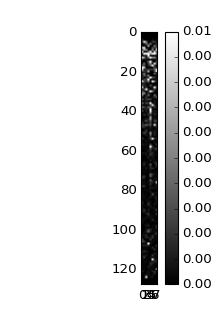

In [125]:
d23_chisq = chisq[100352: 101376]
d23_chisq.shape = 8, 128
plt.imshow(d23_chisq.T, cmap='gray')
plt.clim(0, 0.01)
plt.colorbar()

In [126]:
d23_chisq[d23_chisq > 1e-2]

array([ 0.01452051,  0.01292165,  0.01247853,  0.01155825,  0.02027359,
        0.05785221,  0.01202104,  0.02594932,  0.02614669,  0.01183333,
        1.48892556,  0.07063846,  0.03262999,  0.0262667 ,  0.01294928,
        0.07111781,  0.12133693,  0.01979089,  0.01370043,  0.01058252,
        0.01118602,  0.010367  ,  0.39629389,  0.32389607,  0.02632969,
        0.52909547,  0.31776521,  0.32059385,  0.17921347,  0.04080708,
        0.12805122,  0.01028794,  0.23511364,  1.54290048,  0.4085852 ,
        0.01488002,  0.23060468])

In [67]:
new_cal = mtd['new_cal']

In [68]:
new_cal.row(0)

{'detid': 37888,
 'difa': 0.0,
 'difc': 6687.009162989168,
 'tofmax': 1.7976931348623157e+308,
 'tofmin': 0.0,
 'tzero': 0.0}

In [70]:
new_cal.row(1000)

{'detid': 38888,
 'difa': 0.0,
 'difc': 6292.301400544343,
 'tofmax': 1.7976931348623157e+308,
 'tofmin': 0.0,
 'tzero': 0.0}

In [33]:
L1 = 20.
L2 = 6. # approx
# assume sin(\theta) = 1.
DIFC = (L1+L2)/np.pi * 1. * 0.0015882549421289758 * 1e6
print DIFC

13144.4884964


This does not look all wrong

In [71]:
new_cal.getColumnNames()

['detid', 'difc', 'difa', 'tzero', 'tofmin', 'tofmax']

In [72]:
new_cal.rowCount()

115712

In [75]:
tzero = np.array(new_cal.column('tzero'))

In [76]:
tzero[tzero!=0]

array([-17.05092474, -22.23964048, -19.88473689, ...,   6.07947734,
        -7.48798738, -14.95207155])

In [112]:
tzero[5106]

25.045022048222833

In [114]:
%%time
LoadEventAndCompress(Filename="/SNS/SEQ/IPTS-19573/nexus/SEQ_130273.nxs.h5", OutputWorkspace=wkspName,
                     MaxChunkSize=16, FilterBadPulses=25)
CropWorkspace(InputWorkspace=wkspName, OutputWorkspace=wkspName, XMin=300, XMax=16666.7)

# dbinning=(.01,-.001,4.)
dbinning = (0.4,0.00005,7)
AlignDetectors(InputWorkspace=wkspName, OutputWorkspace='aligned', CalibrationWorkspace='new_cal')
CropWorkspace(InputWorkspace='aligned', OutputWorkspace='aligned',
              XMin=dbinning[0], XMax=dbinning[2])
Rebin(InputWorkspace='aligned', OutputWorkspace='aligned', Params=dbinning)

CPU times: user 7min 2s, sys: 3min 6s, total: 10min 9s
Wall time: 6min 34s


In [78]:
%%time
msa.SumSpectra(InputWorkspace='aligned', OutputWorkspace='I_d_s_aligned')

CPU times: user 5.51 s, sys: 1min 25s, total: 1min 31s
Wall time: 1min 37s


EventWorkspace
Title: Si powder, White beam, Ei set to 250meV T0=30
Histograms: 1
Bins: 5995
Histogram
X axis: d-Spacing / Angstrom
Y axis: Counts
Distribution: False
Instrument: SEQUOIA (2012-Apr-04 to 2100-Jan-31)Instrument from: /SNS/SEQ/IPTS-19573/nexus/SEQ_130271.nxs.h5

Parameters from: /home/lj7/dv/mantid/mantid/instrument/SEQUOIA_Parameters.xml
Run start: 2017-Jul-14 04:26:01
Run end:  2017-Jul-14 06:21:57

Events: 838864418 (weighted, no times)

<IPython.core.display.Javascript object>


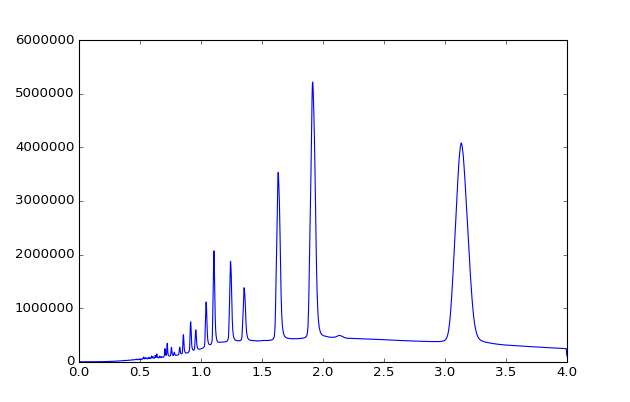

In [79]:
ws = I_d_s_aligned = mtd['I_d_s_aligned']
plt.plot(ws.readX(0)[:-1], ws.readY(0))

In [82]:
msa.SaveNexus('new_cal', './difc_cal.nxs')

Grouping

The only information missing for `SaveDiffCal` is which pixels to combine to make an output spectrum. This is done using [CreateGroupingWorkspace](http://docs.mantidproject.org/nightly/algorithms/CreateGroupingWorkspace-v1.html). For NOMAD, the `Column` option will generate 6 spectra. An alternative is to generate a grouping file to load with [LoadDetectorsGroupingFile](http://docs.mantidproject.org/nightly/algorithms/LoadDetectorsGroupingFile-v1.html).

In [53]:
# cat /SNS/software/miniconda2/envs/py2/instrument/SEQUOIA_Definition.xml

In [29]:
msa.CreateGroupingWorkspace(InstrumentName='SEQ', GroupDetectorsBy='bank', OutputWorkspace='SEQ_group')

CreateGroupingWorkspace_returns(OutputWorkspace=Title: 
Histograms: 115712
, NumberGroupedSpectraResult=0, NumberGroupsResult=0)

Save

In [30]:
calib_path2 = '/SNS/users/lj7/reduction/SEQ/det-calibration/SEQ_d130271.h5'
msa.SaveDiffCal(
    CalibrationWorkspace='new_cal', 
    GroupingWorkspace='SEQ_group',
    Filename=calib_path2)

[DetectorDiagnostic](http://docs.mantidproject.org/nightly/algorithms/DetectorDiagnostic-v1.html) uses statistical criteria for determining what pixels should be used to produce final data

In [ ]:
LoadEventAndCompress(Filename='NOM_78771', OutputWorkspace='NOM_78771',
                    MaxChunkSize=8, FilterBadPulses=25)
DetectorDiagnostic(InputWorkspace='NOM_78771', OutputWorkspace='NOM_mask_detdiag',
                   RangeLower=300, RangeUpper=16666.7, # TOF range to use
                   LowThreshold=10, # minimum number of counts for a detector
                   LevelsUp=1) # median calculated from the tube

The result of `DetectorDiagnostic` can be combined with the result of the mask generated by `PDCalibration` using [BinaryOperateMasks](http://docs.mantidproject.org/nightly/algorithms/BinaryOperateMasks-v1.html)

In [ ]:
BinaryOperateMasks(InputWorkspace1='new_cal_mask', InputWorkspace2='NOM_mask_detdiag',
                   OperationType='OR', OutputWorkspace='NOM_mask_final')

In [ ]:
CreateGroupingWorkspace(InstrumentName='NOMAD', GroupDetectorsBy='Group',
                       OutputWorkspace='NOM_group')

In [ ]:
SaveDiffCal(CalibrationWorkspace='new_cal',
             GroupingWorkspace='NOM_group',
             MaskWorkspace='NOM_mask_final',
            Filename='/tmp/NOM_d79584.h5')

[AlignComponents](https://github.com/mantidproject/mantid/blob/master/docs/source/algorithms/AlignComponents-v1.rst)
-----------------
This algorithm can be used to update the instrument geometry itself by optimizing the position of the physical components to the `DIFC` from calibration.

In [135]:
SEQ_calib = LoadDiffCal(
    InstrumentName='SEQ',
    Filename=calib_path2,
    WorkspaceName="SEQ",
    TofMin=300, TofMax=16667)

In [136]:
SEQ_calib

LoadDiffCal_returns(OutputGroupingWorkspace=Title: /SNS/users/lj7/reduction/SEQ/det-calibration/SEQ_d130271.h5
Histograms: 115712
, OutputMaskWorkspace=Title: /SNS/users/lj7/reduction/SEQ/det-calibration/SEQ_d130271.h5
Histograms: 115712
Masked: 0
, OutputCalWorkspace=TableWorkspace
Columns: 6
Rows: 115712
4 MB)

In [137]:
mtd['SEQ_cal']

TableWorkspace
Columns: 6
Rows: 115712
4 MB

In [138]:
%%time
idf_orig = os.path.join(ConfigService.getInstrumentDirectory(), 'SEQUOIA_Definition.xml')
AlignComponents(CalibrationTable='SEQ_cal',
                MaskWorkspace='SEQ_mask',
                InstrumentFilename=idf_orig,
                FitSamplePosition=True,
                Zposition=True)

CPU times: user 2.26 s, sys: 35.9 ms, total: 2.29 s
Wall time: 2.3 s


In [139]:
alignedWorkspace = mtd['alignedWorkspace']

In [140]:
inst = alignedWorkspace.getInstrument()

In [141]:
inst.getSample().getPos()

[0,0,-0.00850447]

In [142]:
inst.getSource().getPos()

[0,0,-20.0114]

Sample position was updated!

Load just the IDF

In [143]:
seq_inst_ws = msa.LoadEmptyInstrument(Filename='/SNS/software/miniconda2/envs/py2/instrument/SEQUOIA_Definition.xml')

check a bank position

In [147]:
pos = seq_inst_ws.getInstrument().getComponentByName("B10/eightpack").getPos()
print pos
print np.linalg.norm(pos)

[3.20999,-1.2948,4.30556]
5.5243401427


In [151]:
%%time
components = 'B10/eightpack'
print components
AlignComponents(
    CalibrationTable='SEQ_cal',
    MaskWorkspace='SEQ_mask',
    # Workspace='alignedWorkspace',
    InstrumentFilename=idf_orig,
    ComponentList=components,
    # EulerConvention="YZX",
    # AlphaRotation=True,
    Xposition=False,
    Yposition=False, Zposition=True
)

B10/eightpack
CPU times: user 2.33 s, sys: 12.6 ms, total: 2.34 s
Wall time: 2.34 s


In [152]:
pos_new = mtd['alignedWorkspace'].getInstrument().getComponentByName("B10/eightpack").getPos()
print pos_new
print np.linalg.norm(pos_new)

[3.20999,-1.2948,4.27766]
5.50262533957
